<a href="https://colab.research.google.com/github/szywyk/data-analysis-python/blob/main/sea-level-predictor/sea-level-predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')

### Data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [4]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [5]:
df.columns

Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')

In [6]:
df.shape

(134, 5)

### Create scatter plot and predict sea level in year 2050 using the line of best fit (purple - using all data; red - using only data after year 2000).

Text(0.5, 1.0, 'Rise in Sea Level')

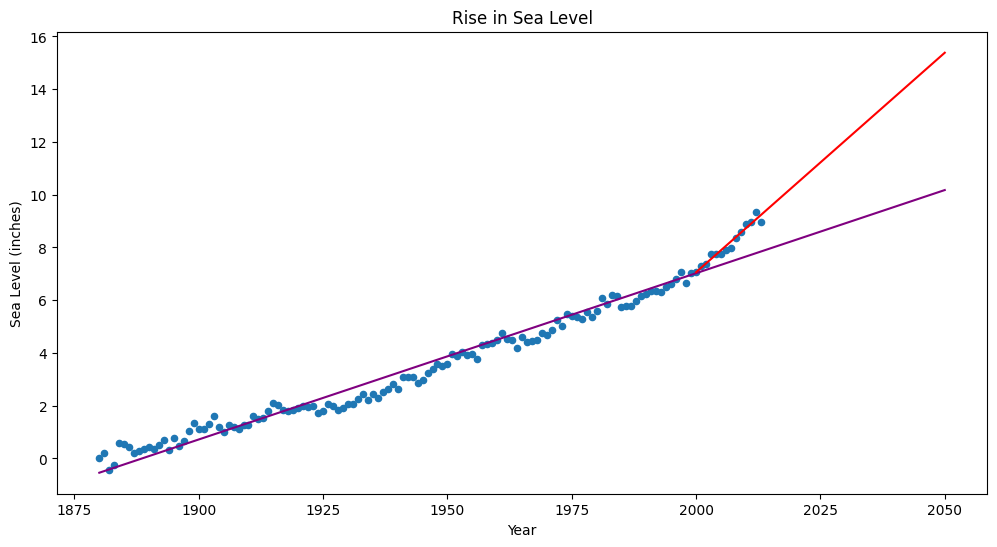

In [10]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
df.plot.scatter(ax=ax, x='Year', y='CSIRO Adjusted Sea Level')

# Create first line of best fit (all years)
reg = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
x = np.arange(1880, 2051)
ax.plot(x, reg.intercept + reg.slope*x, color='purple')
    
# Create second line of best fit (after year 2000)
recent_df = df.loc[df['Year'] >= 2000 , ['Year', 'CSIRO Adjusted Sea Level']]
recent_years = recent_df['Year']
recent_levels = recent_df['CSIRO Adjusted Sea Level']
reg1 = linregress(x=recent_years, y=recent_levels)
x1 = np.arange(2000, 2051)
ax.plot(x1, reg1.intercept + reg1.slope*x1, color='red')
    
# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')